# CAR PRICE PREDICTION

Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data.We have to make 
car price valuation model. This project contains two phase.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("used_car_data")
df

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,12,12,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,14,14,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,58,58,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,62,62,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,63,63,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
6219,6411,6449,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,6412,6450,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,6419,6457,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,6422,6460,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


From the above information we can say that given dataset contains 6224 rows and 12 columns.

# Checking the null value:

In [13]:
df.isnull()

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6219,False,False,False,False,False,False,False,False,False,False,False,False
6220,False,False,False,False,False,False,False,False,False,False,False,False
6221,False,False,False,False,False,False,False,False,False,False,False,False
6222,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Model                0
Make_Year            0
Driven_Kilometers    0
Fuel                 0
Transmission         0
Owner(s)             0
Mileage              0
Engine               0
Price                0
Location             0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

Above dataset contains 0 null values.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6224 non-null   int64  
 1   Unnamed: 0.1       6224 non-null   int64  
 2   Model              6224 non-null   object 
 3   Make_Year          6224 non-null   int64  
 4   Driven_Kilometers  6224 non-null   int64  
 5   Fuel               6224 non-null   object 
 6   Transmission       6224 non-null   object 
 7   Owner(s)           6224 non-null   int64  
 8   Mileage            6224 non-null   float64
 9   Engine             6224 non-null   int64  
 10  Price              6224 non-null   int64  
 11  Location           6224 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 583.6+ KB


above dataset contains 1 float, 7 int and 4 object data type.

In [18]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
count,6224.000000,6224.000000,6224.000000,6224.000000,6224.000000,6224.000000,6224.000000,6.224000e+03
mean,3192.622269,3211.346562,2014.862789,58242.295148,1.214653,19.957942,1405.529724,7.030040e+05
std,1858.576428,1868.306842,3.056772,37702.893801,0.467354,3.872215,467.313843,7.639553e+05
min,0.000000,0.000000,2000.000000,500.000000,1.000000,7.500000,624.000000,4.500000e+04
25%,1583.750000,1592.750000,2013.000000,32119.250000,1.000000,17.400000,1197.000000,3.550000e+05
50%,3185.500000,3205.500000,2015.000000,55000.000000,1.000000,20.140000,1248.000000,5.000000e+05
75%,4801.250000,4828.250000,2017.000000,77072.250000,1.000000,22.540000,1498.000000,7.000000e+05
max,6423.000000,6461.000000,2021.000000,886253.000000,4.000000,36.000000,5000.000000,9.100000e+06


# check the outliers:

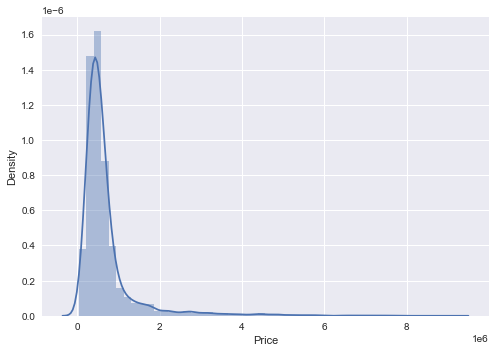

In [19]:
plt.style.use('seaborn')
sns.distplot(df['Price'])
plt.show()

from univariate analysis, we can say that the data is normally distributed.

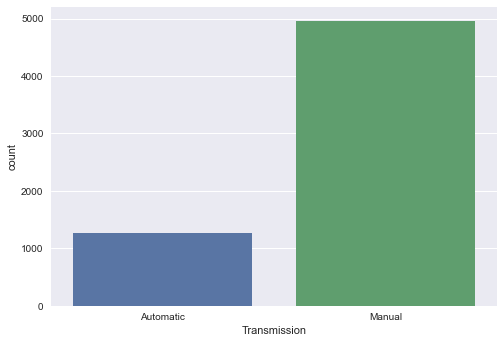

In [20]:
sns.countplot(x = 'Transmission', data = df)
plt.show()

<AxesSubplot:xlabel='Fuel', ylabel='count'>

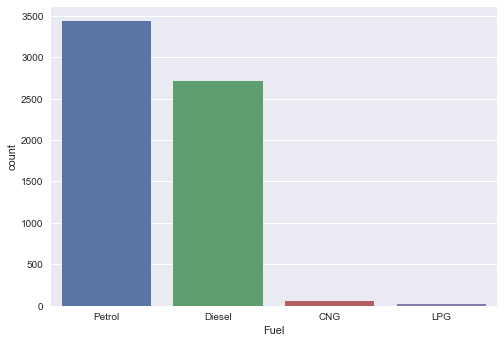

In [21]:
sns.countplot(x = 'Fuel', data = df)

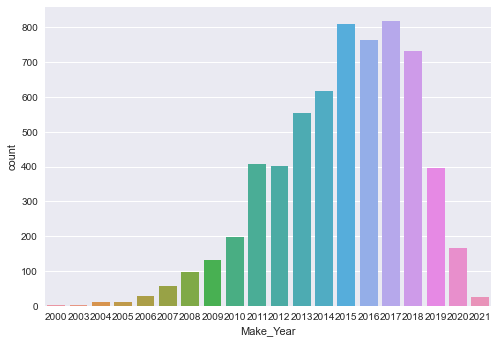

In [22]:
sns.countplot(x = 'Make_Year', data = df)
plt.show()

Bivariate analysis:

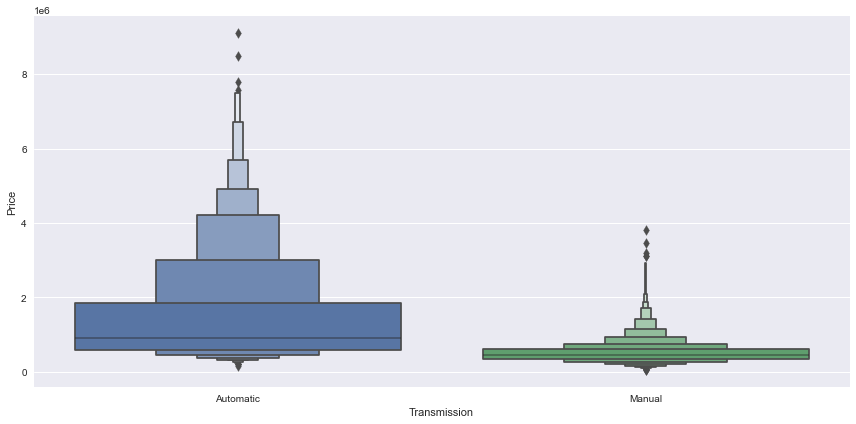

In [23]:
# Relation between Airline and Flight Price

sns.catplot(y = 'Price', x = 'Transmission',data= df.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

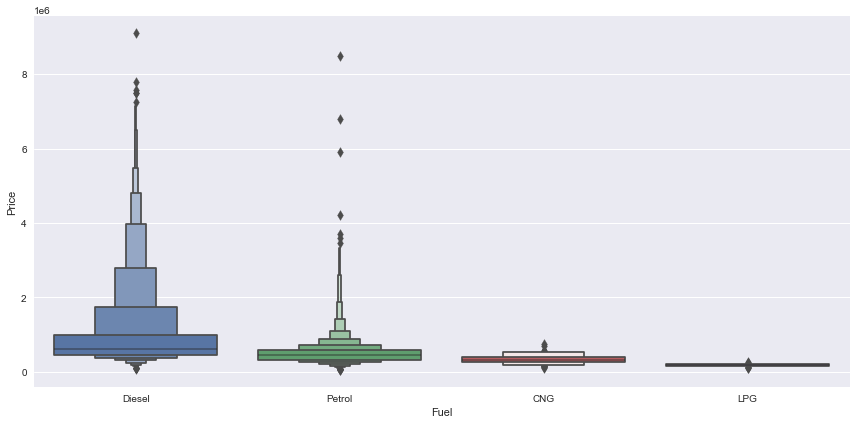

In [24]:
# Relation between Airline and Flight Price

sns.catplot(y = 'Price', x = 'Fuel',data= df.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

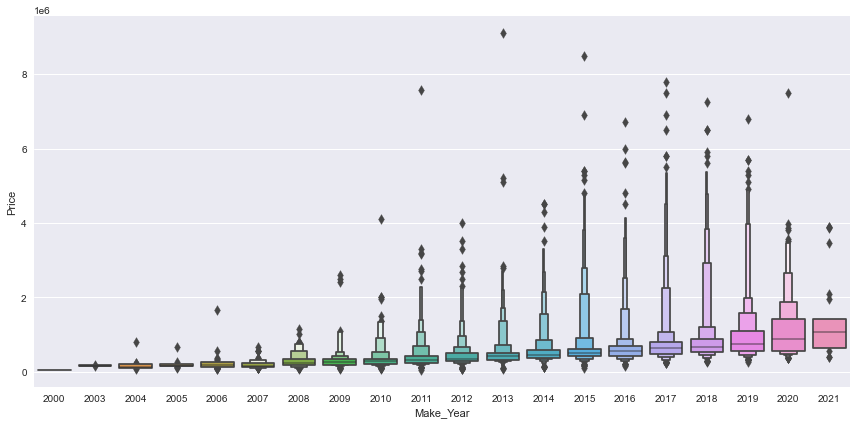

In [25]:
# Relation between Airline and Flight Price

sns.catplot(y = 'Price', x = 'Make_Year',data= df.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

Multivariate Analysis:

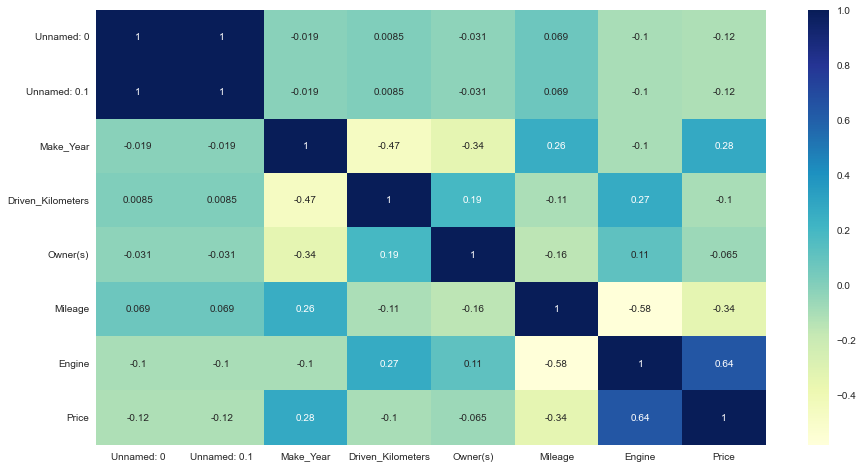

In [26]:
#Let's check the correlation by using the Heatmap (in order to check teh relation between features)

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot = True)
plt.show()

In [27]:
df.corr()

,Unnamed: 0,Unnamed: 0.1,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
Unnamed: 0,1.000000,1.000000,-0.019450,0.008515,-0.030608,0.069375,-0.102364,-0.117369
Unnamed: 0.1,1.000000,1.000000,-0.019447,0.008505,-0.030633,0.069407,-0.102396,-0.117420
Make_Year,-0.019450,-0.019447,1.000000,-0.467516,-0.338092,0.258220,-0.102814,0.278047
Driven_Kilometers,0.008515,0.008505,-0.467516,1.000000,0.193648,-0.106689,0.268711,-0.100129
Owner(s),-0.030608,-0.030633,-0.338092,0.193648,1.000000,-0.159762,0.110342,-0.064697
Mileage,0.069375,0.069407,0.258220,-0.106689,-0.159762,1.000000,-0.582179,-0.335218
Engine,-0.102364,-0.102396,-0.102814,0.268711,0.110342,-0.582179,1.000000,0.638122
Price,-0.117369,-0.117420,0.278047,-0.100129,-0.064697,-0.335218,0.638122,1.000000


<Figure size 576x396 with 0 Axes>

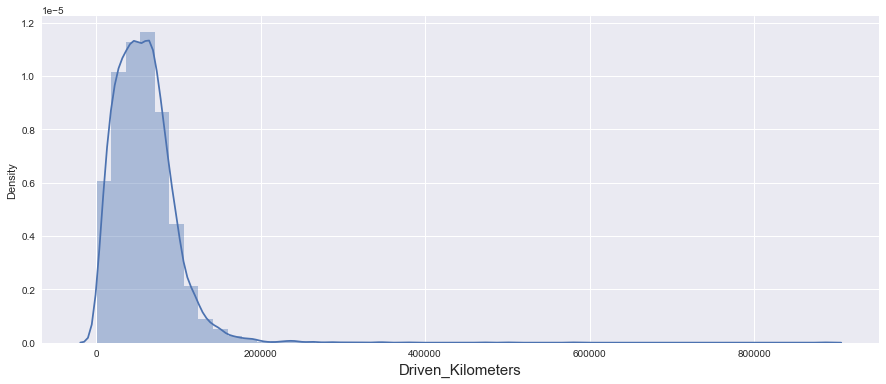

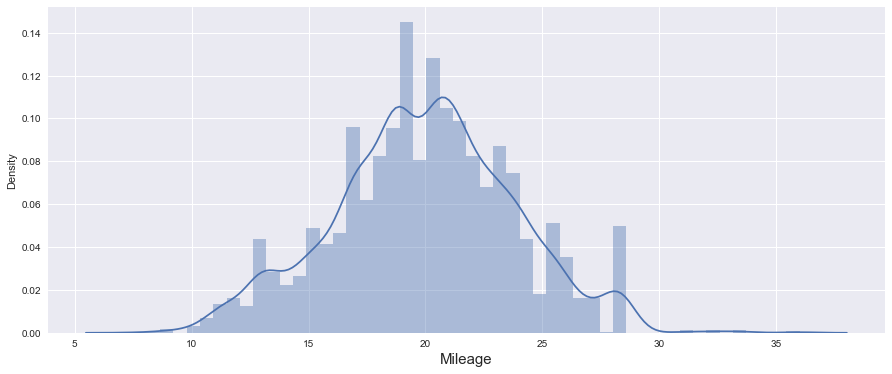

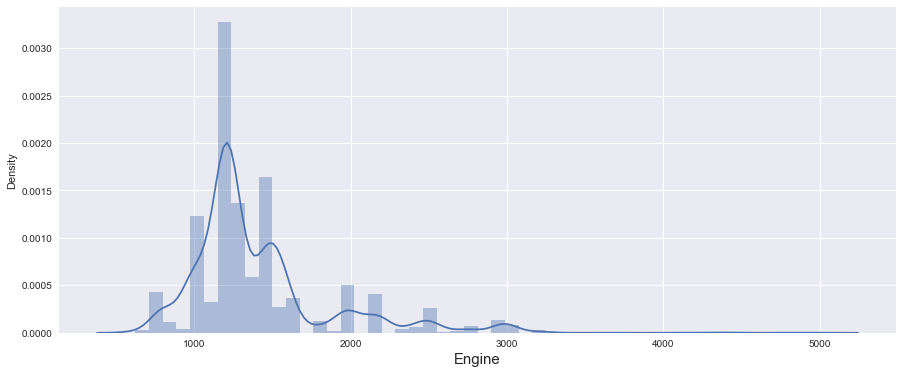

In [29]:
columns = ['Driven_Kilometers', 'Mileage', 'Engine'] #with numerical data

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=15)
plt.show()


<Figure size 576x396 with 0 Axes>

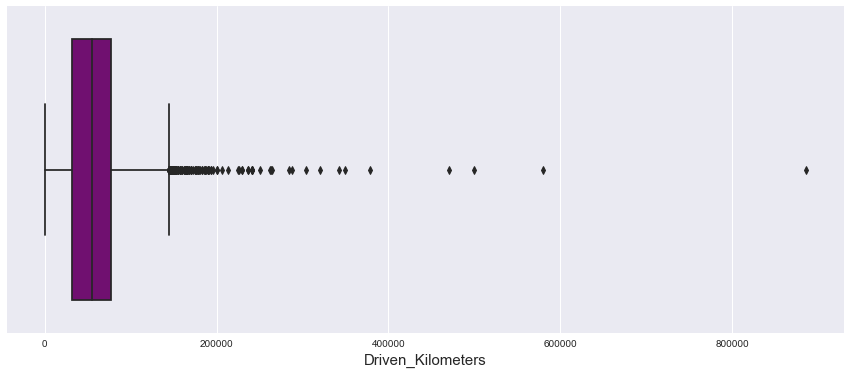

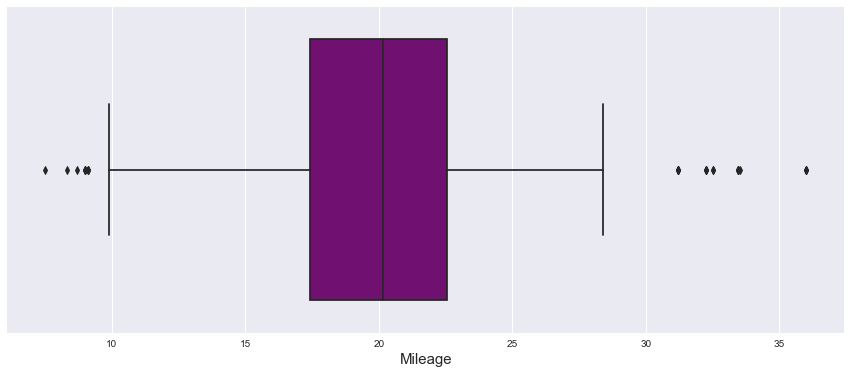

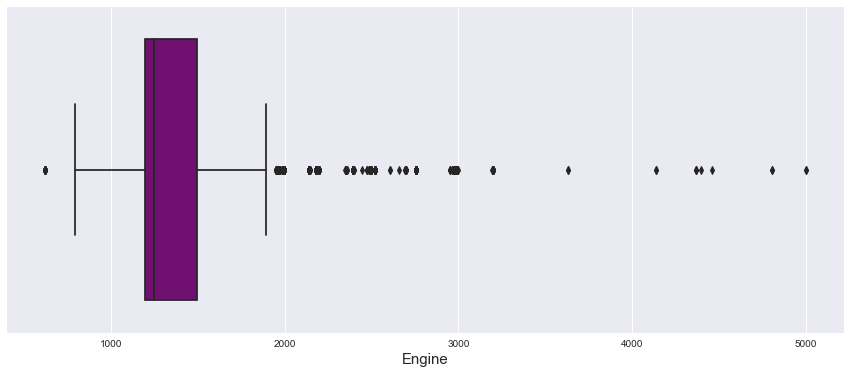

In [30]:
# Using Boxplot to checkthe outliers

columns = ['Driven_Kilometers', 'Mileage', 'Engine']

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.boxplot(df[i],color = 'Purple')
    plt.xlabel(i,fontsize=15)
plt.show()

In [31]:
features = ['Driven_Kilometers', 'Mileage', 'Engine']  #columns with outliers by checking the above plots

In [34]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = df[~((df[features] < (Q1-1.5*IQR)) | (df[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [35]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",df.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((df.shape[0]-data_new1.shape[0])/df.shape[0])*100)

Shape - Before and After:

Shape Before         : (6224, 12)
Shape After          : (6160, 12)
Percentage Loss      : 1.0282776349614395


In [37]:
from scipy.stats import zscore  #importing zscore from library

z=np.abs(zscore(df[features]))
threshold = 3
data_new2 = df[(z<3).all(axis=1)]

In [38]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",df.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((df.shape[0]-data_new2.shape[0])/df.shape[0])*100)

Shape - Before and After:

Shape Before         : (6224, 12)
Shape After          : (6017, 12)
Percentage Loss      : 3.3258354755784065


IQR percentage loss : 1.0282776349614395 
Z-Score percentage loss : 3.3258354755784065

so proceeding forward using IQR method

In [39]:
data_new = data_new1.copy()  #let's copy our new data in another variaible

# Skewness:

In [40]:
#Skewness before applying the outliers technique

df.skew()

Unnamed: 0           0.018102
Unnamed: 0.1         0.017162
Make_Year           -0.611178
Driven_Kilometers    3.696483
Owner(s)             2.253673
Mileage              0.003963
Engine               2.017822
Price                4.320026
dtype: float64

In [42]:
#Skewness after applying the outliers technique

data_new.skew()

Unnamed: 0           0.016925
Unnamed: 0.1         0.015970
Make_Year           -0.611907
Driven_Kilometers    0.701490
Owner(s)             2.244314
Mileage              0.012334
Engine               1.738002
Price                4.160594
dtype: float64

In [43]:
data_new['Driven_Kilometers'] = np.sqrt(data_new['Driven_Kilometers'])

data_new['Engine'] = np.log(data_new['Engine'])
data_new['Engine'] = np.cbrt(data_new['Engine'])
data_new['Engine'] = np.sqrt(data_new['Engine'])

In [44]:
data_new.skew()

Unnamed: 0           0.016925
Unnamed: 0.1         0.015970
Make_Year           -0.611907
Driven_Kilometers   -0.130465
Owner(s)             2.244314
Mileage              0.012334
Engine               0.746089
Price                4.160594
dtype: float64

In [46]:
# Create a dataframe that will contain the Brands (by extracting the name from the title of the model column)

df1 = {}
df1 = pd.DataFrame(data_new['Model'].str.split().tolist(), columns="Brand Models A B C D E F G H".split())
df1 = df1.drop(columns=['Models','A','B','C','D','E','F','G','H'],axis=1)


df1['Index'] = range(6160) #creating an index column


df1.set_index('Index',inplace=True)#assigning the index column
df1

,Brand
Index,
0,Maruti
1,Hyundai
2,Audi
3,Honda
4,Mercedes-Benz
...,...
6155,Ford
6156,Maruti
6157,Toyota


In [47]:
data_new['Index'] = range(6160)


data_new.set_index('Index',inplace=True) #assigning the index
data_new

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
Index,,,,,,,,,,,,
0,12,12,Maruti Wagon R,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad
1,14,14,Hyundai Verna CRDi . AT SX Plus,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad
2,58,58,Audi A TDI Premium Plus,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad
3,62,62,Honda City i VTEC CVT VX,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad
4,63,63,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
6155,6411,6449,Ford EcoSport . Diesel Titanium BSIV,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune
6156,6412,6450,Maruti Wagon R VXI Plus,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune
6157,6419,6457,Toyota Yaris G BSIV,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune


In [48]:
Used_Cars = pd.concat([data_new, df1], axis=1) #Combine both the datasets

In [49]:
Used_Cars  #Display the extracted dataset

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
Index,,,,,,,,,,,,,
0,12,12,Maruti Wagon R,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,14,14,Hyundai Verna CRDi . AT SX Plus,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,58,58,Audi A TDI Premium Plus,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,62,62,Honda City i VTEC CVT VX,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad,Honda
4,63,63,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,6411,6449,Ford EcoSport . Diesel Titanium BSIV,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune,Ford
6156,6412,6450,Maruti Wagon R VXI Plus,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune,Maruti
6157,6419,6457,Toyota Yaris G BSIV,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune,Toyota


In [50]:
Used_Cars.reset_index('Index',inplace=True) #reset the index

In [51]:
Used_Cars = Used_Cars.drop('Index',axis=1) #remove the extra columns
Used_Cars = Used_Cars.drop('Model',axis=1)

In [52]:
Used_Cars  #Our datset is now ready

,Unnamed: 0,Unnamed: 0.1,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,12,12,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,14,14,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,58,58,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,62,62,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad,Honda
4,63,63,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...,...
6155,6411,6449,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune,Ford
6156,6412,6450,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune,Maruti
6157,6419,6457,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune,Toyota
6158,6422,6460,2012,262.678511,Petrol,Manual,1,17.43,1.390924,465000,Pune,Hyundai


In [53]:
Used_Cars['Brand'].unique()

array(['Maruti', 'Hyundai', 'Audi', 'Honda', 'Mercedes-Benz', 'Kia',
       'Skoda', 'Toyota', 'Ford', 'Nissan', 'Jaguar', 'BMW', 'Mini',
       'Volvo', 'Mahindra', 'Volkswagen', 'Renault', 'Land', 'Tata', 'MG',
       'Porsche', 'Mitsubishi', 'Chevrolet', 'New', 'Jeep', 'Datsun',
       'Force', 'Fiat', 'OpelCorsa'], dtype=object)

In [54]:
Used_Cars['Brand'].value_counts()


Maruti           2136
Hyundai          1311
Honda             568
Ford              307
Toyota            289
Volkswagen        280
Mahindra          250
Renault           205
Mercedes-Benz     123
Tata              102
BMW               101
Skoda              99
Audi               91
Chevrolet          67
Nissan             64
Kia                28
Datsun             20
Jaguar             20
Land               20
Jeep               16
MG                 13
Fiat               12
Volvo              11
Mitsubishi         11
Mini                6
Porsche             6
New                 2
Force               1
OpelCorsa           1
Name: Brand, dtype: int64

In [55]:
Used_Cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [56]:
Used_Cars['Make_Year'].unique()

array([2017, 2018, 2016, 2019, 2014, 2015, 2009, 2011, 2013, 2020, 2008,
       2021, 2012, 2007, 2010, 2005, 2004, 2006, 2003, 2000], dtype=int64)

In [57]:
#Let's use Label encoder for encoding some of the columns

l1 = ['Transmission','Fuel','Make_Year'] 

#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function

for i in l1:
    Used_Cars[i]= le.fit_transform(Used_Cars[i].values.reshape(-1,1))
Used_Cars.head()

,Unnamed: 0,Unnamed: 0.1,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,12,12,15,202.913775,3,0,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,14,14,15,264.575131,1,0,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,58,58,16,121.107390,1,0,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,62,62,14,234.520788,3,0,1,18.00,1.393151,877999,Ahmedabad,Honda
4,63,63,17,174.602405,1,0,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz


In [58]:
#Get dummies
l2=pd.get_dummies(Used_Cars['Brand'])

#Concat with main dataframe by dropping workclass dataframe
Used_Cars=pd.concat([Used_Cars.drop('Brand',axis=1),l2],axis=1)

In [59]:
#Get dummies
l3=pd.get_dummies(Used_Cars['Location'])

#Concat with main dataframe by dropping workclass dataframe
Used_Cars=pd.concat([Used_Cars.drop('Location',axis=1),l3],axis=1)

In [60]:
Used_Cars

,Unnamed: 0,Unnamed: 0.1,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,...,Chennai,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,NCR,New Delhi,Noida,Pune
0,12,12,15,202.913775,3,0,1,20.51,1.379966,430000,...,0,0,0,0,0,0,0,0,0,0
1,14,14,15,264.575131,1,0,1,22.00,1.394900,894999,...,0,0,0,0,0,0,0,0,0,0
2,58,58,16,121.107390,1,0,1,18.25,1.401707,3200000,...,0,0,0,0,0,0,0,0,0,0
3,62,62,14,234.520788,3,0,1,18.00,1.393151,877999,...,0,0,0,0,0,0,0,0,0,0
4,63,63,17,174.602405,1,0,1,16.10,1.401423,4800000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,6411,6449,17,173.205081,1,1,1,23.00,1.393173,990000,...,0,0,0,0,0,0,0,0,0,1
6156,6412,6450,15,200.000000,3,1,1,20.51,1.379966,450000,...,0,0,0,0,0,0,0,0,0,1
6157,6419,6457,16,153.762804,3,1,1,17.10,1.393130,1000000,...,0,0,0,0,0,0,0,0,0,1
6158,6422,6460,10,262.678511,3,1,1,17.43,1.390924,465000,...,0,0,0,0,0,0,0,0,0,1


# splitting features in X and Y:

In [61]:
X = Used_Cars.drop(columns = 'Price') #Features
Y = Used_Cars['Price'] #Label

In [62]:
#let's check for our dimensions after splitting the data

print('Features dimension:\t',X.shape,'\nLabel Dimension:\t',Y.shape)

Features dimension:	 (6160, 50) 
Label Dimension:	 (6160,)


In [63]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

# Best Random State:

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.7855665390740038  with Random State  148


In [73]:
#Let's split our dataset for training and testing purpose

x_train,x_test,y_train,y_test = train_test_split (X_scaled, Y, test_size =0.20, random_state = maxRS)

In [74]:
#Importing all required Libraries that will be used for building a model

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

RandomForestRegressor()
R Squared (R2):  90.27546150454575
Mean Squared Error (MSE):  54350365877.57573
Root Mean Squared Error (RMSE):  233131.64924045754
Mean Absolute Error (MAE):  86001.17625811689


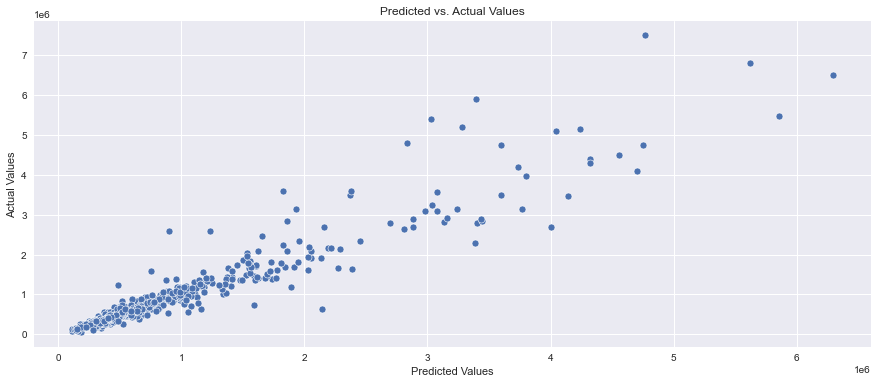

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  77.30326805942342
Mean Squared Error (MSE):  126851848627.288
Root Mean Squared Error (RMSE):  356162.6715804002
Mean Absolute Error (MAE):  154501.71785714285


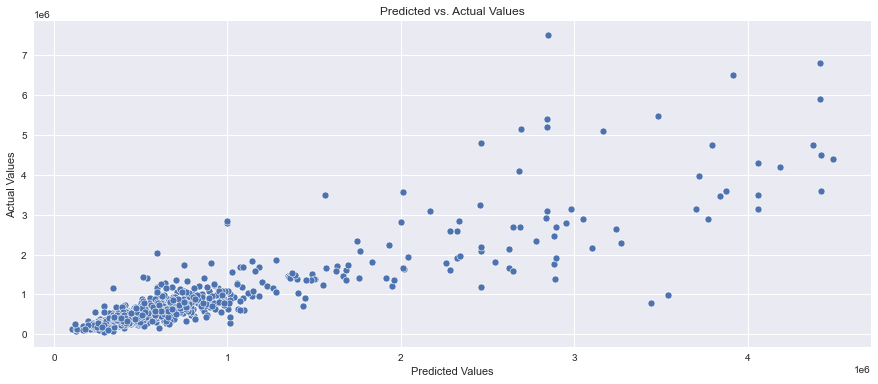

------------------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor()
R Squared (R2):  90.58080964348304
Mean Squared Error (MSE):  52643777633.9243
Root Mean Squared Error (RMSE):  229442.31875119355
Mean Absolute Error (MAE):  115283.50108871605


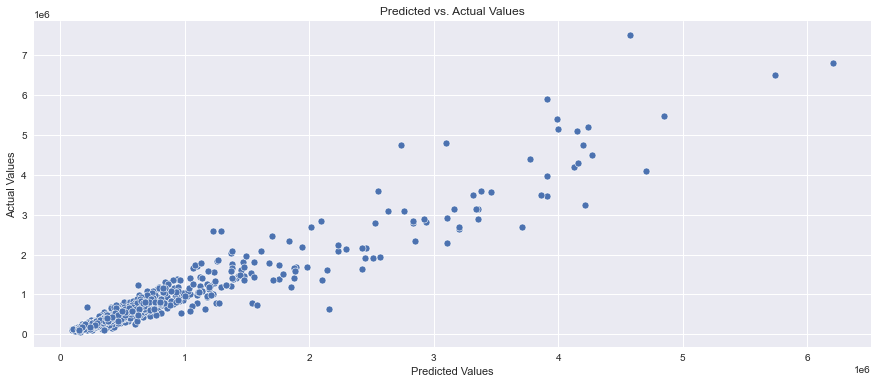

------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(max_features='auto')
R Squared (R2):  85.7876038031086
Mean Squared Error (MSE):  79432965755.56737
Root Mean Squared Error (RMSE):  281838.54554614663
Mean Absolute Error (MAE):  103021.1663961039


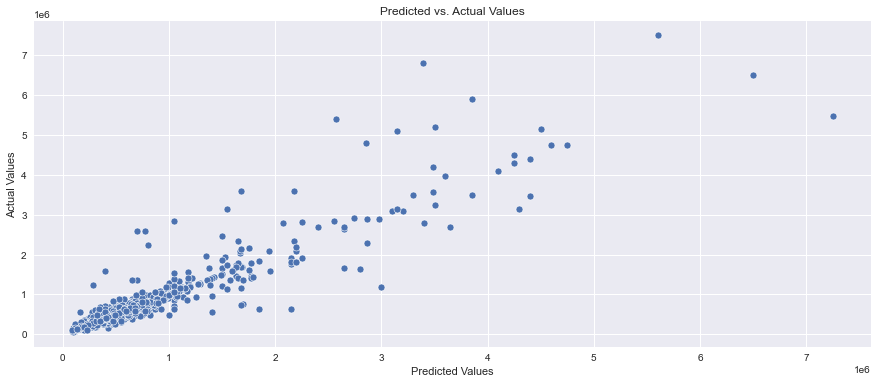

------------------------------------------------------------------------------------------------------------------------
Lasso()
R Squared (R2):  78.5822182255491
Mean Squared Error (MSE):  119703806640.4512
Root Mean Squared Error (RMSE):  345982.3790895299
Mean Absolute Error (MAE):  184509.41230803973


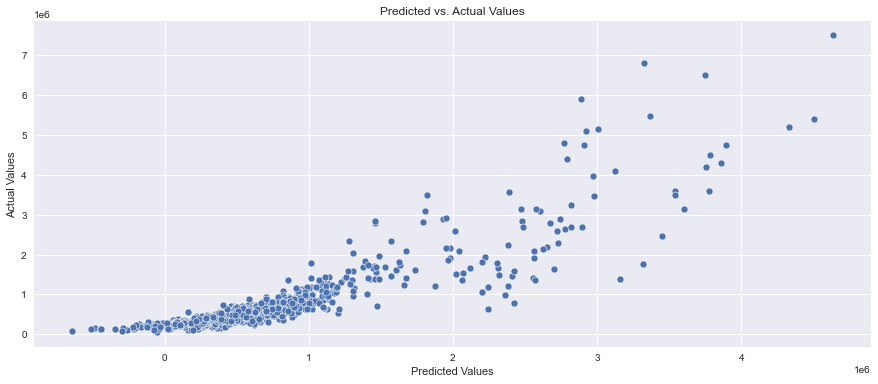

------------------------------------------------------------------------------------------------------------------------
Ridge()
R Squared (R2):  78.58064035028217
Mean Squared Error (MSE):  119712625372.37436
Root Mean Squared Error (RMSE):  345995.1233361163
Mean Absolute Error (MAE):  184474.5029527765


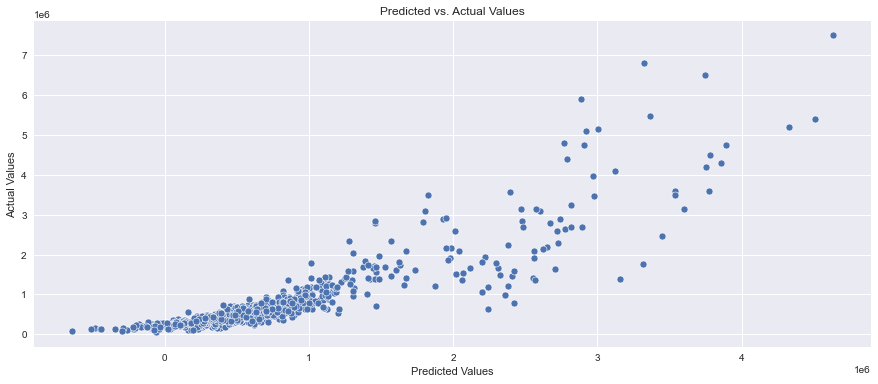

------------------------------------------------------------------------------------------------------------------------


In [75]:
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
gb=GradientBoostingRegressor()
dt = DecisionTreeRegressor(max_features='auto')
ls=Lasso()
rd=Ridge()

model=[rf,kn,gb,dt,ls,rd]
kf = KFold(n_splits=5, random_state=43, shuffle=True)

train=[]
test=[]
cv=[]

for m in model:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    print(m)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,pred_test))
    score=cross_val_score(m,X_scaled,Y,cv=kf)
    cv.append(score.mean()*100)
    plt.figure(figsize=[15,6])
    sns.scatterplot(x=pred_test, y=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    
    
    
    
Overall_score={'Model':['RandomForest','KNN','GradientBoosting','DecisionTree Regressor','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)

In [76]:
Overall_score #display the table

,Model,Training Score,Test Score,Cross Validation Score
0,RandomForest,98.704894,90.275462,89.002160
1,KNN,83.235952,77.303268,74.168119
2,GradientBoosting,93.348335,90.580810,88.239857
3,DecisionTree Regressor,100.000000,85.787604,80.258711
4,Lasso,73.946248,78.582218,73.378824
5,Ridge,73.946126,78.580640,73.378965


In [77]:
#Let's get a new column, that shows the difference between Prediction Test R2 Score and Cross Validation Score

Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']
Overall_score #display the table

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,RandomForest,98.704894,90.275462,89.002160,1.273302
1,KNN,83.235952,77.303268,74.168119,3.135149
2,GradientBoosting,93.348335,90.580810,88.239857,2.340953
3,DecisionTree Regressor,100.000000,85.787604,80.258711,5.528893
4,Lasso,73.946248,78.582218,73.378824,5.203394
5,Ridge,73.946126,78.580640,73.378965,5.201675


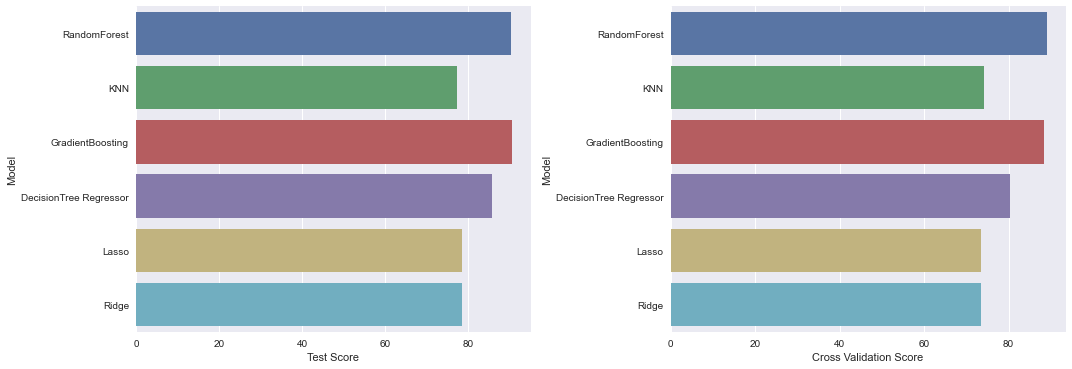

In [78]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Test Score', y = 'Model', data = Overall_score)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Validation Score', y = 'Model', data = Overall_score)
plt.tight_layout()
plt.show()

In [79]:
Overall_score['Difference'].min()  #Find the value with least difference in "Difference Column"

1.273301814798529

In [80]:
#Let's check the row that has the least difference value in "Difference Column"

Overall_score[Overall_score['Difference']==1.5901463211815638]

,Model,Training Score,Test Score,Cross Validation Score,Difference


In [81]:
from sklearn.model_selection import GridSearchCV

#parameters
param_grid = {'n_estimators':[50,100],
             'max_features':['auto','sqrt'],
             'max_depth':[4,5,None],'min_samples_split' : [2, 5, 10],
             'criterion':['squared_error','mse'],'min_samples_leaf': [1, 2, 3]}   

gridsearch=GridSearchCV(estimator = rf, param_grid = param_grid,cv=5)     

gridsearch.fit(x_train,y_train) #training the model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse'],
                         'max_depth': [4, 5, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [82]:
print(gridsearch.best_score_, gridsearch.best_params_)  #finding the best parameters 


0.8941734067048419 {'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


# Performance metrics of model:

In [90]:
Rand_Final = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=None,criterion='mse',
                                   min_samples_split=2,min_samples_leaf=1)

Rand_Final.fit(x_train,y_train)  #training the model
predictions = Rand_Final.predict(x_test)  #predicting

In [91]:
print('R Squared (R2): ',r2_score(y_test,predictions))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,predictions))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,predictions))

R Squared (R2):  0.9071971191656589
Mean Squared Error (MSE):  51867453969.12425
Root Mean Squared Error (RMSE):  227744.2731862302
Mean Absolute Error (MAE):  86362.39456168831


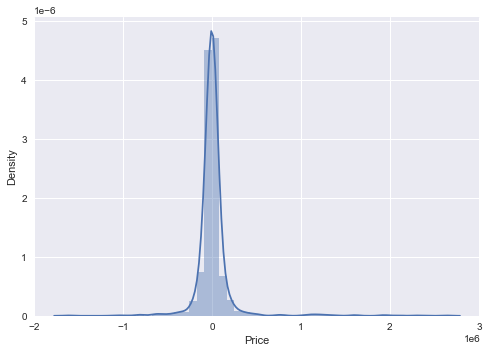

In [92]:
#Let's again plot the difference between the y_test price and our model predicted price

sns.distplot(y_test-predictions)
plt.show()

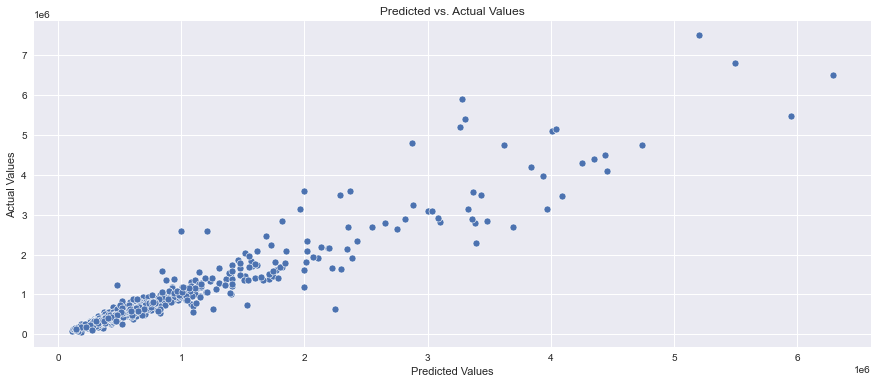

In [93]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

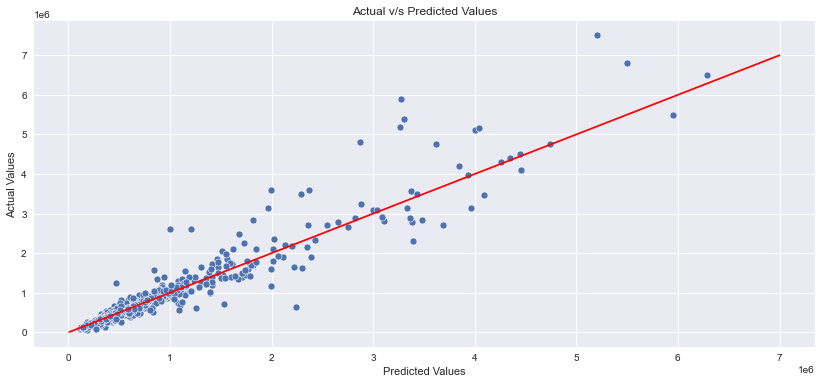

In [94]:
# plot LOO predictions against actual
plt.figure(figsize=[14,6])

plot_LOO = sns.scatterplot(predictions,y_test)
plot_LOO.set(xlabel='Predicted Values', ylabel='Actual Values')
# generate and graph y = x line
x_plot = np.linspace(10000,7000000)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predicted Values")
plt.show()

So the model is ready with 90.72% acuracy score.

# Saving the model:

In [96]:
Rand_Final = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=None,criterion='mse',
                                   min_samples_split=2,min_samples_leaf=1)

Rand_Final.fit(x_train,y_train)  #training the model
predictions = Rand_Final.predict(x_test)  #predicting

In [98]:
#Let's save our model for future predictions

import joblib

joblib.dump(Rand_Final,'Used_Car_Price_Prediction.obj')

['Used_Car_Price_Prediction.obj']

In [99]:
#Load the saved model

loaded_model = joblib.load(open('Used_Car_Price_Prediction.obj','rb'))

In [100]:
# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

array([427659.95, 295045.  , 402051.99, ..., 596482.64, 590385.  ,
       769619.34])

In [101]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions))
Used_Car_Price = pd.DataFrame(list_of_tuples, columns = ['Actual', 'Predicted'])

In [102]:
pd.set_option ('display.max_rows', None)


Used_Car_Price

,Actual,Predicted
0,484999,427659.95
1,325000,295045.00
2,447500,402051.99
3,395000,370546.99
4,235500,235395.00
5,416500,417926.56
6,529500,472674.34
7,795000,791012.27
8,550000,632145.86
9,414000,431375.92


In [103]:
#Saving the dataframe of the actual v/s predicted values as a csv file

Used_Car_Price.to_csv('Predicted_car_Prices.csv')